# Model Fitting -- Maximum Likelihood Method

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import fsolve, fmin
from scipy.interpolate import interp1d
from scipy.stats import binom, chi2, poisson
import matplotlib.pyplot as plt

## UK

### Read data

In [2]:
T_uk = pd.read_csv('seroprevalence_uk.csv', header=None)
T_uk.columns = ['Age','Positive','Population']
T_uk['Seroprevalence'] = T_uk['Positive']/T_uk['Population']

### Initial guess

In [3]:
theta_0 = 0.1

In [4]:
x = np.linspace(0,T_uk['Age'][len(T_uk['Age'])-1])
z = 1 - np.exp(-theta_0*x)

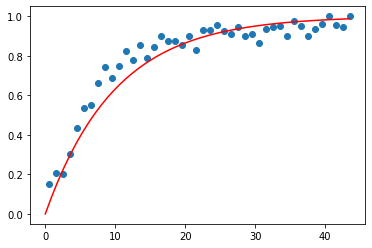

In [5]:
plt.scatter(T_uk['Age'],T_uk['Seroprevalence'])
plt.plot(x,z,'r');

### MLE

Suppose binomial distridution

In [6]:
custnloglf = lambda theta : -sum(np.log(binom.pmf(T_uk['Positive'],T_uk['Population'],1-np.exp(-theta*T_uk['Age']))))
result = minimize(custnloglf,theta_0);
theta_MLE = result.x
theta_MLE

C:\Users\dongm\AppData\Local\Temp/ipykernel_17220/1083208599.py:1: RuntimeWarning: divide by zero encountered in log
  custnloglf = lambda theta : -sum(np.log(binom.pmf(T_uk['Positive'],T_uk['Population'],1-np.exp(-theta*T_uk['Age']))))
C:\Users\dongm\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\dongm\AppData\Local\Temp/ipykernel_17220/1083208599.py:1: RuntimeWarning: divide by zero encountered in log
  custnloglf = lambda theta : -sum(np.log(binom.pmf(T_uk['Positive'],T_uk['Population'],1-np.exp(-theta*T_uk['Age']))))


array([0.11586433])

### Force of infection

In [7]:
theta_MLE_ci = []

chi2_fun = lambda x : chi2.cdf(x,1) - 0.95

chival_95 = fsolve(chi2_fun,2)

best_val = custnloglf(theta_MLE)
best_val

149.9754846876052

In [8]:
nln = lambda theta : custnloglf(theta) - (chival_95/2+best_val)

theta_MLE_ci.append(fsolve(nln,theta_MLE*0.9))
theta_MLE_ci.append(fsolve(nln,theta_MLE*1.1))
theta_MLE_ci = np.array(theta_MLE_ci)

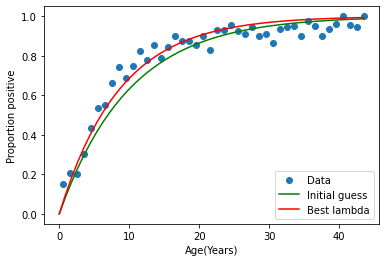

In [9]:
y = 1 - np.exp(-theta_MLE*x)
plt.scatter(T_uk['Age'],T_uk['Seroprevalence'],label='Data')
plt.plot(x,z,'g',label='Initial guess')
plt.plot(x,y,'r',label='Best lambda')
plt.xlabel('Age(Years)')
plt.ylabel('Proportion positive')
plt.legend();

### Average at infection

In [10]:
L = 60
A = 1/theta_MLE
R_0 = L/A
H = 1 - 1/R_0
print(A, R_0, H)

[8.63078361] [6.95186007] [0.85615361]


In [11]:
A_ci = 1/theta_MLE_ci
R_0_ci = L/A_ci
H_ci = 1 - 1/R_0_ci
print(A_ci)
print(R_0_ci)
print(H_ci)

[[9.01614956]
 [8.26411605]]
[[6.65472545]
 [7.26030463]]
[[0.84973084]
 [0.86226473]]


## China


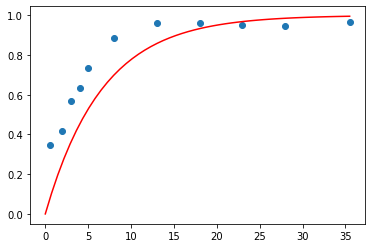

In [12]:
### Read data
T_ch = pd.read_csv('seroprevalence_china.csv', header=None)
T_ch.columns = ['Age','Positive','Population']
T_ch['Seroprevalence'] = T_ch['Positive']/T_ch['Population']
### Initial guess
theta_0 = 0.15
x = np.linspace(0,T_ch['Age'][len(T_ch['Age'])-1])
z = 1 - np.exp(-theta_0*x)
plt.scatter(T_ch['Age'],T_ch['Seroprevalence'])
plt.plot(x,z,'r');


### MLE


Suppose binomial distridution


In [13]:
custnloglf = lambda theta : -sum(np.log(binom.pmf(T_ch['Positive'],T_ch['Population'],1-np.exp(-theta*T_ch['Age']))))
result = minimize(custnloglf,theta_0);
theta_MLE = result.x
theta_MLE


C:\Users\dongm\AppData\Local\Temp/ipykernel_17220/3181077195.py:1: RuntimeWarning: divide by zero encountered in log
  custnloglf = lambda theta : -sum(np.log(binom.pmf(T_ch['Positive'],T_ch['Population'],1-np.exp(-theta*T_ch['Age']))))
C:\Users\dongm\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\dongm\AppData\Local\Temp/ipykernel_17220/3181077195.py:1: RuntimeWarning: divide by zero encountered in log
  custnloglf = lambda theta : -sum(np.log(binom.pmf(T_ch['Positive'],T_ch['Population'],1-np.exp(-theta*T_ch['Age']))))


array([0.20312716])

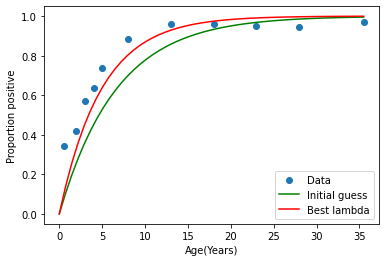

In [14]:
### Force of infection
theta_MLE_ci = []

chi2_fun = lambda x : chi2.cdf(x,1) - 0.95

chival_95 = fsolve(chi2_fun,2)

best_val = custnloglf(theta_MLE)
best_val
nln = lambda theta : custnloglf(theta) - (chival_95/2+best_val)

theta_MLE_ci.append(fsolve(nln,theta_MLE*0.9))
theta_MLE_ci.append(fsolve(nln,theta_MLE*1.1))
theta_MLE_ci = np.array(theta_MLE_ci)
y = 1 - np.exp(-theta_MLE*x)
plt.scatter(T_ch['Age'],T_ch['Seroprevalence'],label='Data')
plt.plot(x,z,'g',label='Initial guess')
plt.plot(x,y,'r',label='Best lambda')
plt.xlabel('Age(Years)')
plt.ylabel('Proportion positive')
plt.legend();


In [15]:
### Average at infection
L = 60
A = 1/theta_MLE
R_0 = L/A
H = 1 - 1/R_0
print(A, R_0, H)
A_ci = 1/theta_MLE_ci
R_0_ci = L/A_ci
H_ci = 1 - 1/R_0_ci
print(A_ci)
print(R_0_ci)
print(H_ci)

[4.92302466] [12.18762938] [0.91794959]
[[5.0414735 ]
 [4.80749938]]
[[11.90128244]
 [12.48050084]]
[[0.91597544]
 [0.91987501]]


# Fit The SEIR Model

## Set the SEIR model

In [16]:
N = 100000
S0, E0, I0, R0 = [99999, 0, 1, 0]
kappa = 1/8
alpha = 1/7

In [22]:
def solve_SEIR(theta,time_stamp):

    from scipy.integrate import solve_ivp

    def ode_sys(t,y):
        N = 100000						# Population 100,000 people
        kappa = 1/8 					# Pre-infectious period 8 days
        alpha = 1/7					    # Infectious period 7 days

        dydt = [-theta*y[0]*y[2],
                theta*y[0]*y[2] - kappa*y[1],
                kappa*y[1] - alpha*y[2],
                alpha*y[2]]
        return dydt
    
    t_begin = 0.
    t_end = time_stamp[len(time_stamp)-1]
    t_space = time_stamp

    y_init = [99999, 0, 1, 0]

    method = 'RK45'
    result = solve_ivp(ode_sys,[t_begin,t_end],y_init,method=method,t_eval=t_space,dense_output=True)
    E = result.y

    ave_E = (E[:-1]+E[1:])/2
    new_infec = kappa*ave_E

    weekly_infec = [[sum(new_infec[7*i:7*(i+1)-1])] for i in range(20)]

    return weekly_infec


## Read data

In [23]:
T = pd.read_csv('incidence_measles.csv', header=None)
T.columns = ['Time','Positive']
time_stamp = np.linspace(1,210,210)

In [24]:
nloglf = lambda theta : -sum(np.log(max(np.finfo(float).eps,poisson.cdf(T['Positive'],solve_SEIR(theta,time_stamp)))))

In [ ]:
result = fmin(nloglf,2e-5)